In [16]:
#DATASET PROPUESTA #5 Banking_Dataset_Classification
#Se importa libreria Pandas y se lee archivo new_train.csv
import pandas as pd
data=pd.read_csv('new_train.csv')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [2]:
data.info() data.describe() data.shape

SyntaxError: invalid syntax (3396608377.py, line 1)

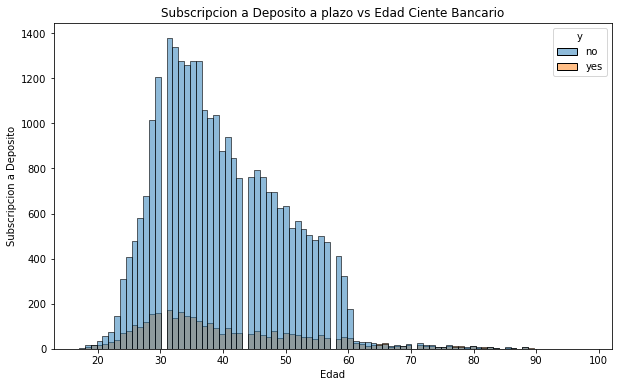

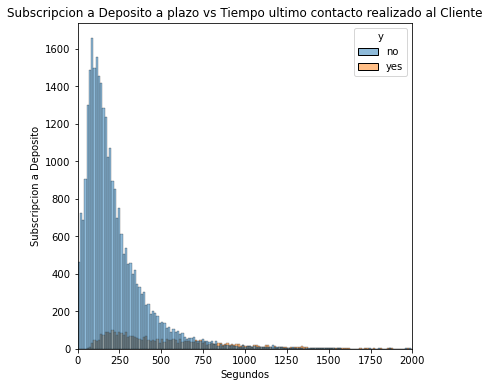

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title("Subscripcion a Deposito a plazo vs Edad Ciente Bancario")
plt.xlabel('Edad')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=data,x='age',hue='y') #utilizando librerias seaborn para graficar
plt.show()
#Los clientes con edad entre 18-24 y 60-100 son aquellos que mas realizaron depositos a plazo porcentualmente

plt.figure(figsize=(6,6))
plt.title("Subscripcion a Deposito a plazo vs Tiempo ultimo contacto realizado al Cliente")
plt.xlabel('Segundos')
plt.ylabel('Subscripcion a Deposito')
plt.xlim(0,2000)
sns.histplot(data=data,x='duration',hue='y') #utilizando librerias seaborn para graficar
plt.show()
#Las llamadas a clientes con duracion menor a 100 segundos no concretaron con realizar depositos
#Las llamadas con duracion entre 500 segundos o mas tuvieron mas de un 50% de concretar en depositos.

In [18]:
# import data modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ModuleNotFoundError: No module named 'imblearn'

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'target variable')

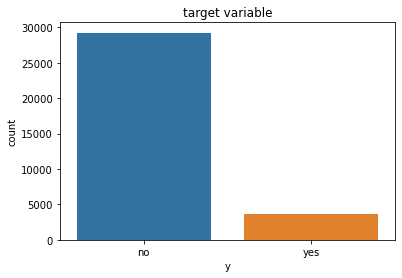

In [19]:
sns.countplot(data["y"])
plt.title("target variable")

In [20]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


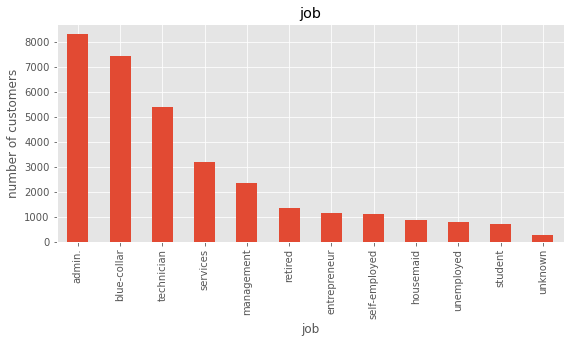

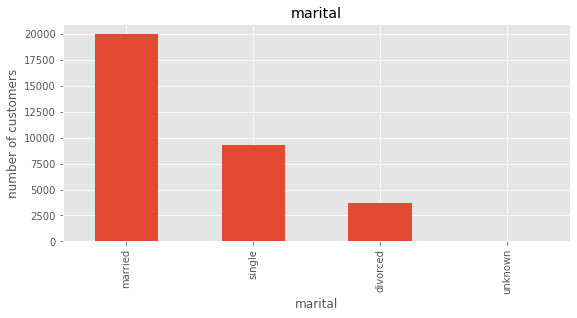

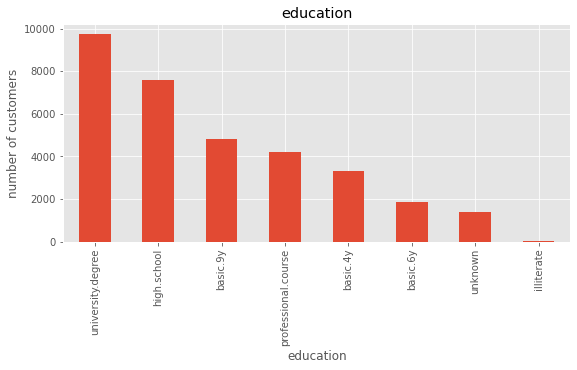

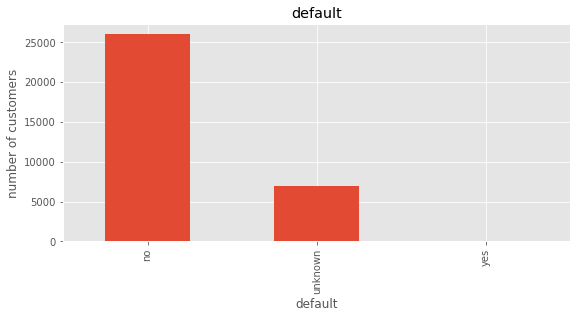

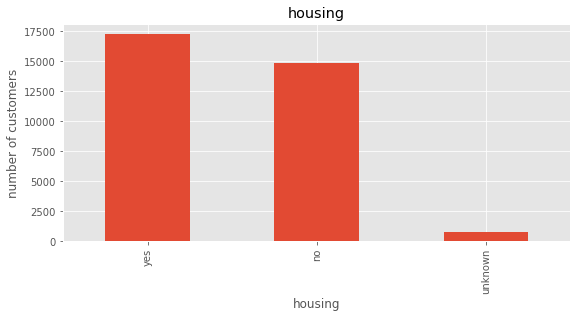

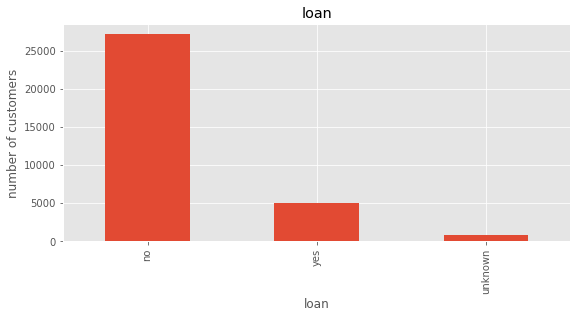

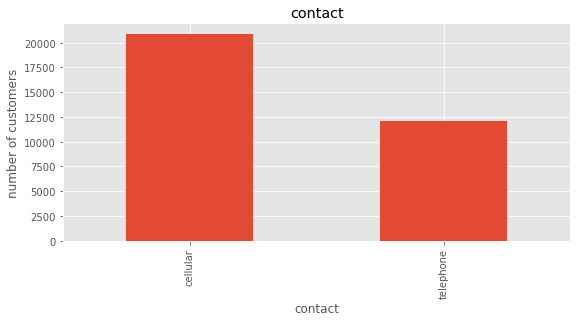

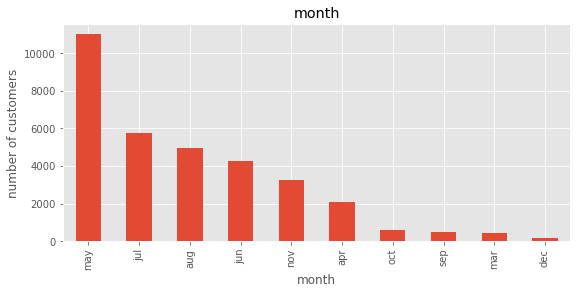

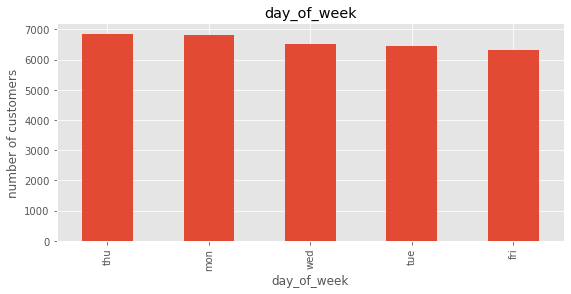

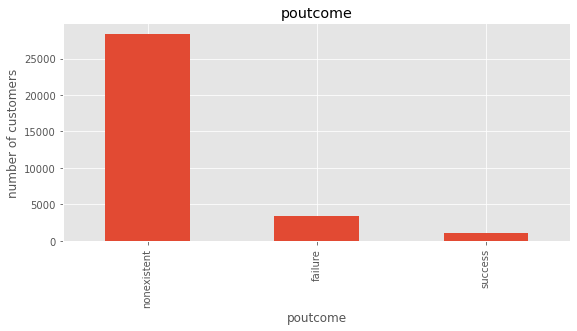

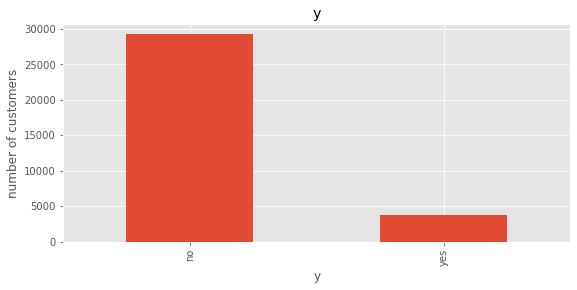

In [21]:
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)
    
#The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
#A huge number of the customers are married.
#Majority of the customers do not have a credit in default
#Many of our past customers have applied for a housing loan but very few have applied for personal loans.
#Cell-phones seem to be the most favoured method of reaching out to customers.
#Many customers have been contacted in the month of May.
#The plot for the target variable shows heavy imbalance in the target variable.

In [22]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

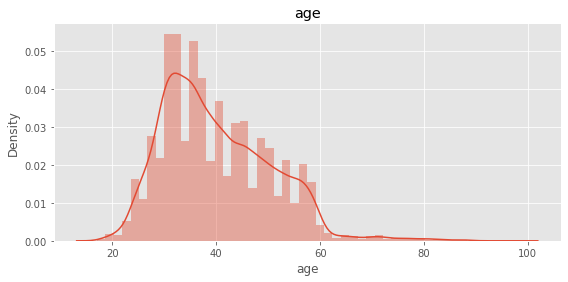

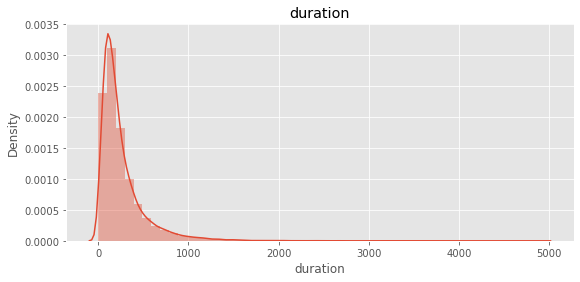

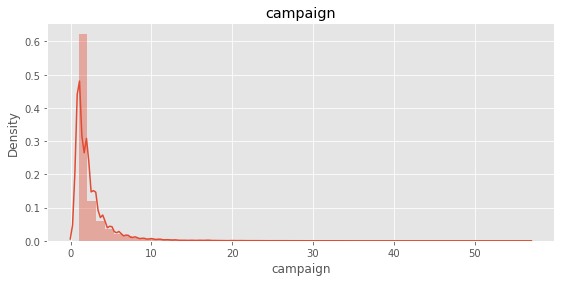

In [23]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

In [24]:
#Since pdays and previous consist majorly only of a single value
#their variance is quite less and hence we can drop them since technically will be of no help in prediction.

data.drop(columns=["pdays", "previous"], axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda

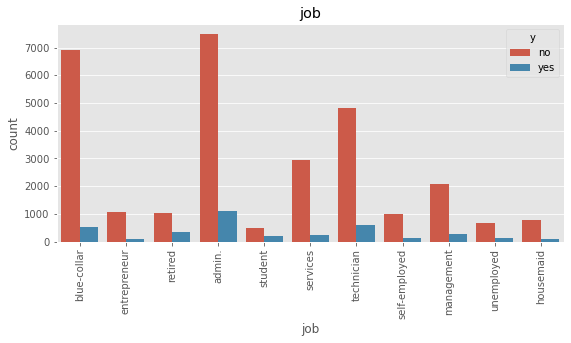

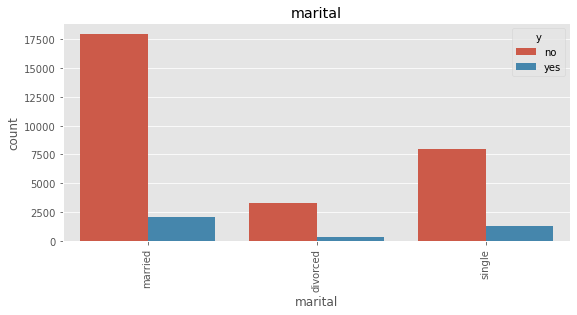

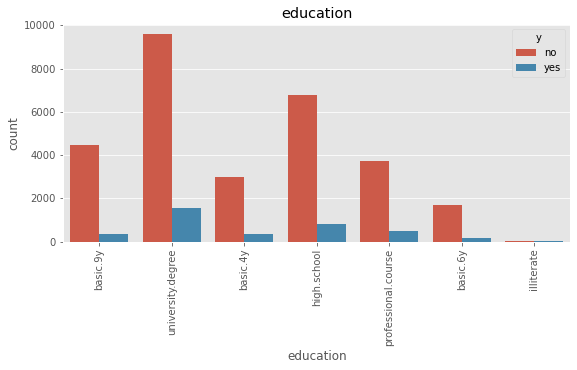

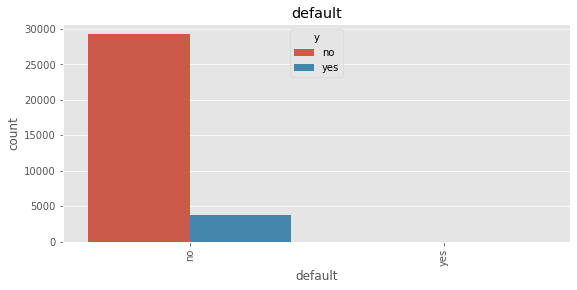

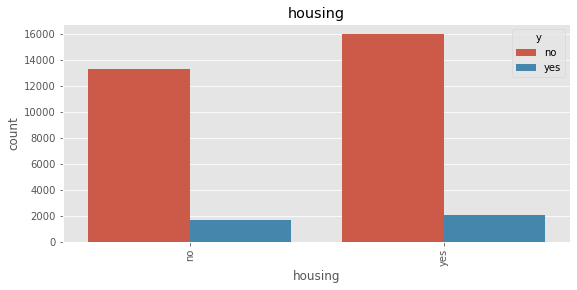

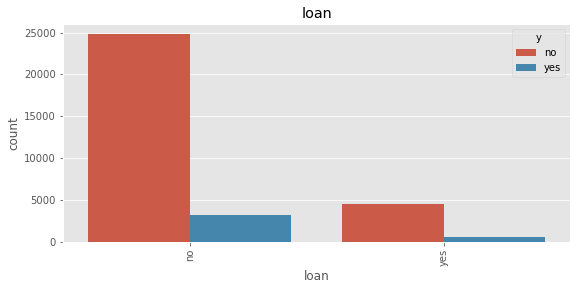

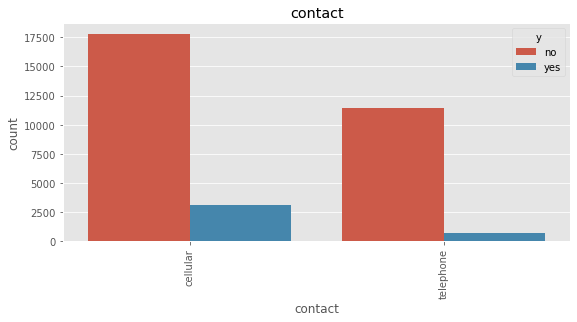

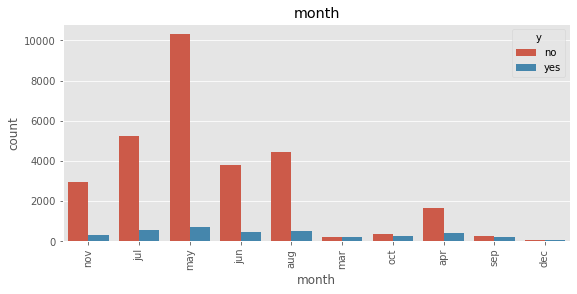

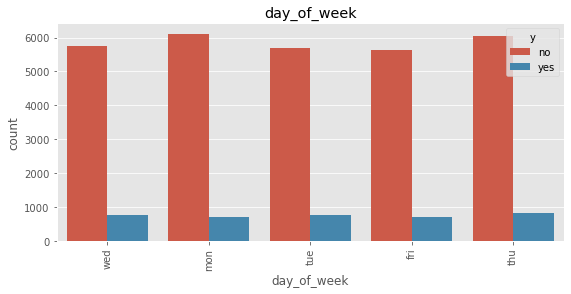

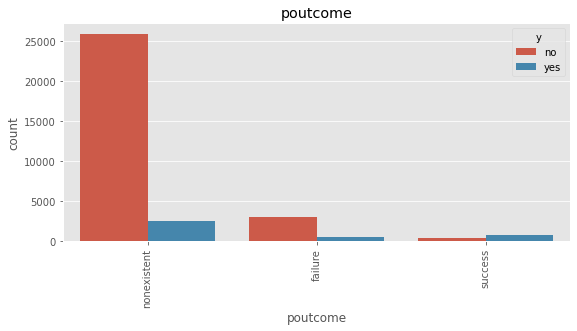

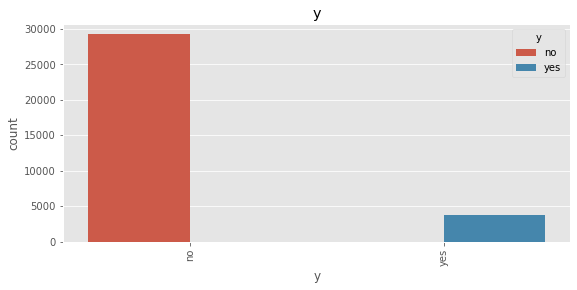

In [25]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data[column], hue=data["y"])
    plt.title(column)    
    plt.xticks(rotation=90)

In [26]:
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [27]:
# feature variables
x= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

<AxesSubplot:>

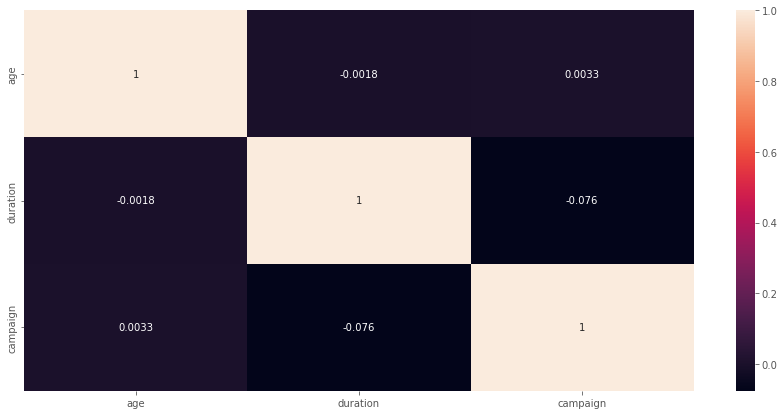

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [30]:
#initialising oversampling
smote= SMOTETomek(0.75)

#implementing oversampling to training data
x_sm, y_sm= smote.fit_sample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

NameError: name 'SMOTETomek' is not defined

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

NameError: name 'x_sm' is not defined

In [32]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

NameError: name 'LogisticRegression' is not defined

In [33]:
# checking model performance
y_predicted= gridsearch_log.predict(x_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

NameError: name 'gridsearch_log' is not defined

In [34]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

NameError: name 'RandomForestClassifier' is not defined

In [35]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

NameError: name 'randomsearch_rf' is not defined